Task1 
a) Display the Red, Green and Blue color channels separately in a 1X3 plot. 

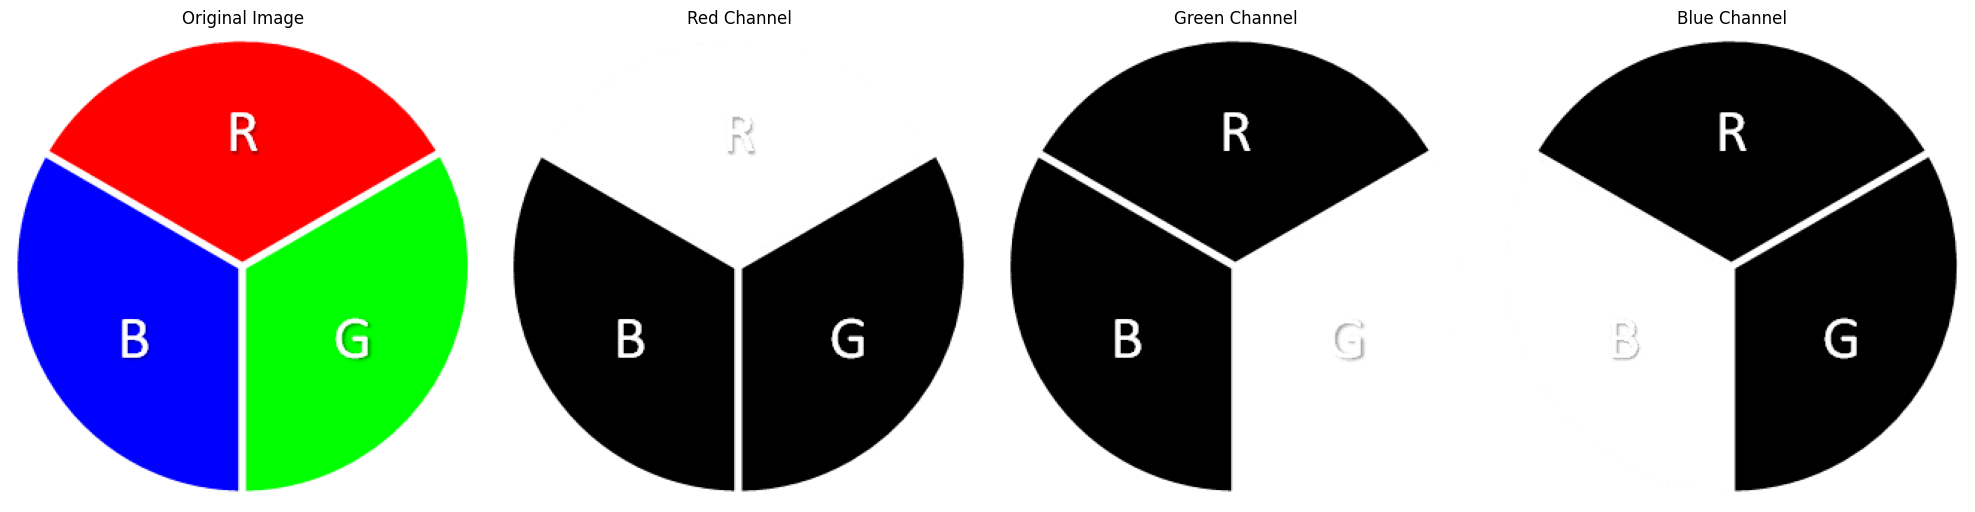

In [1]:
import cv2
import matplotlib.pyplot as plt

# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(cv2.imread('./Images/colors.png'), cv2.COLOR_BGR2RGB)

# Normalize the color channels
img_rgb = img_rgb / 255.0

# Split the image into red, green, and blue channels
red_channel, green_channel, blue_channel = cv2.split(img_rgb)

# Plot the original image and color channels
fig, subplots = plt.subplots(1, 4, figsize=(20,5))

# Original image
subplots[0].imshow(img_rgb)
subplots[0].set_title("Original Image")
subplots[0].axis('off')

# Color channels
channels = [red_channel, green_channel, blue_channel]
channel_names = ['Red', 'Green', 'Blue']

for i, (channel, name) in enumerate(zip(channels, channel_names), start=1):
    subplots[i].imshow(channel, cmap='gray') 
    subplots[i].set_title(f"{name} Channel")
    subplots[i].axis('off')

plt.tight_layout()
plt.show()


B)Apply a mask on the original image based on pixel intensity values where red pixel values are in the range 
(100-255) and blue and green pixel values are in the range (0-50) and show the masked image.


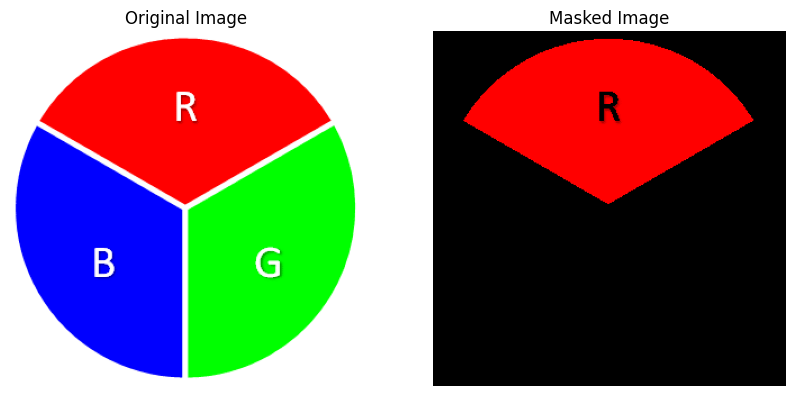

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image and convert it to RGB
image_rgb = cv2.cvtColor(cv2.imread('./Images/colors.png'), cv2.COLOR_BGR2RGB)

# Define the lower and upper bounds for the mask
lower_bound = np.array([0, 0, 0])
upper_bound = np.array([255, 50, 50])

# Create the mask
mask = cv2.inRange(image_rgb, lower_bound, upper_bound)

# Apply the mask to the original image
masked_image = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Plot the original image and masked image
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Masked image
plt.subplot(1, 2, 2)
plt.imshow(masked_image)
plt.title('Masked Image')
plt.axis('off')

plt.show()


Task1
c) Convert the original image to grayscale using the formula, grayscale = ((Red + Green + Blue) / 3) and display the image.


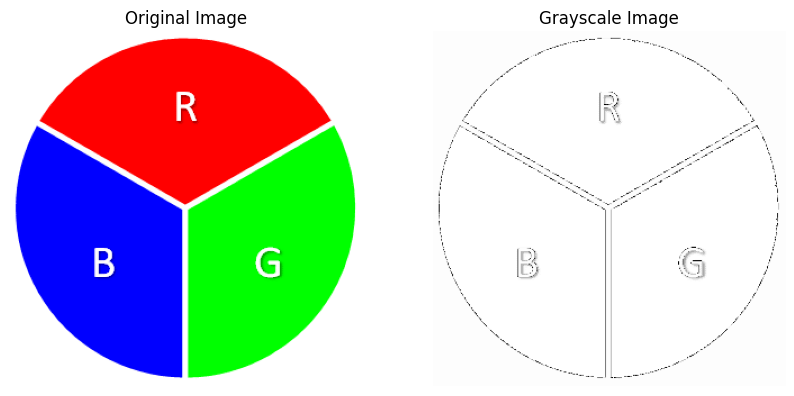

In [4]:
import cv2
import matplotlib.pyplot as plt

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(cv2.imread('./Images/colors.png'), cv2.COLOR_BGR2RGB)

# Calculate the grayscale image using the formula (R + G + B) / 3
grayscale_img = (image_rgb[:, :, 0] + image_rgb[:, :, 1] + image_rgb[:, :, 2]) / 3

# Plot the original image and grayscale image
fig, subplots = plt.subplots(1, 2, figsize=(10, 5))

# Original image
subplots[0].imshow(image_rgb)
subplots[0].set_title('Original Image')
subplots[0].axis('off')

# Grayscale image
subplots[1].imshow(grayscale_img, cmap='gray')
subplots[1].set_title('Grayscale Image')
subplots[1].axis('off')

plt.show()


Task 2 

a) Import the "apple.jpg" image 
<img src = "Images/apple.jpg" style="width:400px;height:250px">

We'd like to extract the green apple from the image above. Apply a suitable mask to extract the green apple from the RGB image. Then, covert the image to HSV space and apply a suitable Hue range to extract the green apple.  

Display the original image, the masked image in RGB space and the masked image in HSV color space in a 1X3 plot. 

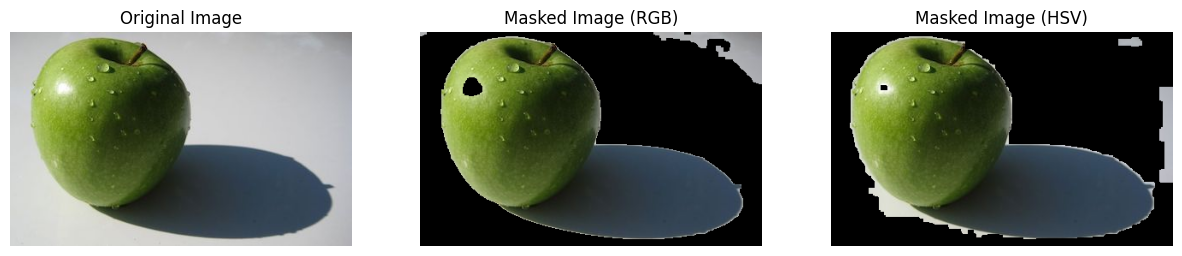

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(cv2.imread("./Images/apple.jpg"), cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Apply a suitable mask to extract the green apple from the RGB image
# Define lower and upper bounds for green color in RGB space
lower_green = np.array([0, 0, 0], dtype=np.uint8)
upper_green = np.array([200, 255, 180], dtype=np.uint8)

# Create a mask for green pixels in the specified range using inRange function
mask_rgb = cv2.inRange(image_rgb, lower_green, upper_green)

# Apply morphological operations (opening and closing) to refine the mask
kernel = np.ones((5, 5), np.uint8)
mask_rgb = cv2.morphologyEx(mask_rgb, cv2.MORPH_OPEN, kernel)
mask_rgb = cv2.morphologyEx(mask_rgb, cv2.MORPH_CLOSE, kernel)

# Apply the mask to the original image
masked_image_rgb = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_rgb)

# Display the masked image in RGB space
plt.subplot(1, 3, 2)
plt.imshow(masked_image_rgb)
plt.title('Masked Image (RGB)')
plt.axis('off')

# Convert the image to HSV space
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Apply a suitable Hue range to extract the green apple in HSV space
# Define lower and upper bounds for green color in HSV space
lower_green_hue = np.array([0, 10, 20], dtype=np.uint8)
upper_green_hue = np.array([255, 255, 255], dtype=np.uint8)

# Create a mask for green pixels in the specified Hue range using inRange function
mask_hsv = cv2.inRange(image_hsv, lower_green_hue, upper_green_hue)

# Apply morphological operations (opening and closing) to refine the mask
mask_hsv = cv2.morphologyEx(mask_hsv, cv2.MORPH_OPEN, kernel)
mask_hsv = cv2.morphologyEx(mask_hsv, cv2.MORPH_CLOSE, kernel)

# Apply the mask to the original image in HSV space
masked_image_hsv = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_hsv)

# Display the masked image in HSV space
plt.subplot(1, 3, 3)
plt.imshow(masked_image_hsv)
plt.title('Masked Image (HSV)')
plt.axis('off')

plt.show()


b) Import the "stop-sign.jpg" image 

<img src = "Images/stop-sign.jpg" style="width:500px;height:333px">

We'd like to extract the red stop sign from the image above. Apply a suitable mask to extract the stop sign in RGB color space. Then, covert the image to HSV space and apply a suitable Hue range to extract the stop sign.  

Display the original image, the masked image in RGB space and the masked image in HSV color space in a 1X3 plot.

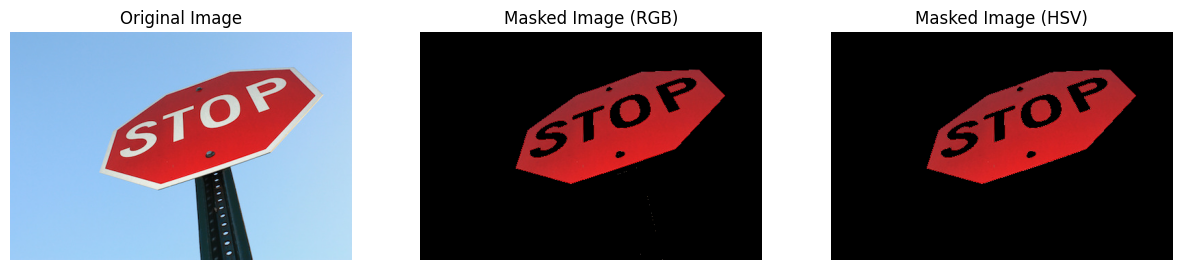

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(cv2.imread("./Images/stop-sign.jpg"), cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Apply a suitable mask to extract the red stop sign in the RGB image
# Define lower and upper bounds for red color in RGB space
lower_red = np.array([100, 0, 0], dtype=np.uint8)
upper_red = np.array([255, 100, 100], dtype=np.uint8)

# Create a mask for red pixels in the specified range
mask_rgb = cv2.inRange(image_rgb, lower_red, upper_red)

# Apply the mask to the original image
masked_image_rgb = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_rgb)

# Display the masked image in RGB space
plt.subplot(1, 3, 2)
plt.imshow(masked_image_rgb)
plt.title('Masked Image (RGB)')
plt.axis('off')

# Convert the image to HSV space
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Apply a suitable Hue range to extract the red stop sign in HSV space
# Define lower and upper bounds for red color in HSV space
lower_red_hue1 = np.array([0, 100, 100], dtype=np.uint8)
upper_red_hue1 = np.array([10, 255, 255], dtype=np.uint8)

lower_red_hue2 = np.array([170, 100, 100], dtype=np.uint8)
upper_red_hue2 = np.array([180, 255, 255], dtype=np.uint8)

# Create masks for red pixels in the specified Hue ranges
mask_hsv1 = cv2.inRange(image_hsv, lower_red_hue1, upper_red_hue1)
mask_hsv2 = cv2.inRange(image_hsv, lower_red_hue2, upper_red_hue2)
mask_hsv = cv2.bitwise_or(mask_hsv1, mask_hsv2)

# Apply the mask to the original image in HSV space
masked_image_hsv = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_hsv)

# Display the masked image in HSV space
plt.subplot(1, 3, 3)
plt.imshow(masked_image_hsv)
plt.title('Masked Image (HSV)')
plt.axis('off')

plt.show()


Task3 
Import the "cameraman.jpeg" image and apply different geometric transformations to it.

a) Shift the original image 50 pixels left and 50 pixels down and display the translated image.

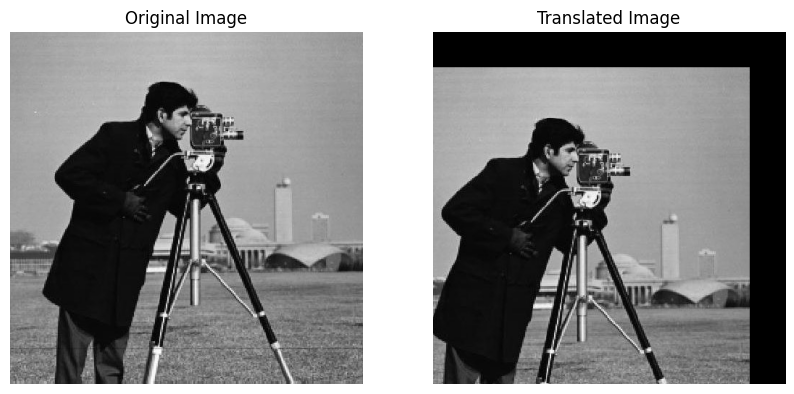

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./Images/cameraman.jpeg')

# Define the translation parameters
dx, dy = -50, 50  # Translation in x and y directions

# Perform translation using warpAffine function
translated_image = cv2.warpAffine(image, np.float32([[1, 0, dx], [0, 1, dy]]), (image.shape[1], image.shape[0]))

# Plot the original and translated images
fig, subplots = plt.subplots(1, 2, figsize=(10, 5))

subplots[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
subplots[0].set_title("Original Image")
subplots[0].subplotsis('off')

subplots[1].imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
subplots[1].set_title("Translated Image")
subplots[1].subplotsis('off')

plt.show()


b) Rotate the image counter-clockwise by 45 degree and display the result

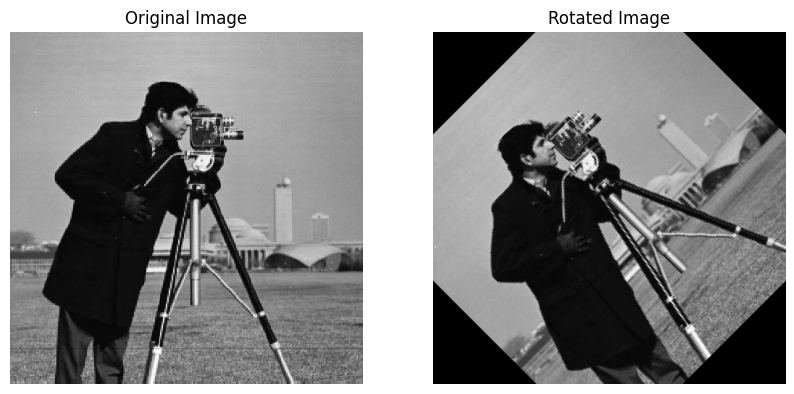

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./Images/cameraman.jpeg')

# Get the image center
center = (image.shape[1] // 2, image.shape[0] // 2)

# Define the rotation angle
angle = 45

# Compute the rotation matrix
M = cv2.getRotationMatrix2D(center, angle, 1)

# Perform rotation using OpenCV's warpAffine function
rotated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

# Plot the original and rotated images
fig, subplots = plt.subplots(1, 2, figsize=(10, 5))

subplots[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
subplots[0].set_title("Original Image")
subplots[0].subplotsis('off')

subplots[1].imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
subplots[1].set_title("Rotated Image")
subplots[1].subplotsis('off')

plt.show()


c) Flip the image vertically and horizontally and display the results in a 1X2 plot.

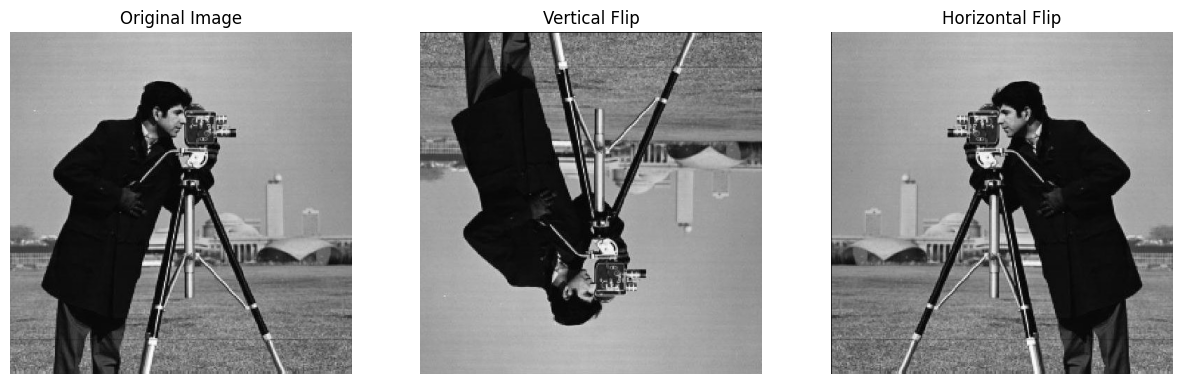

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
input_image = cv2.imread('./Images/cameraman.jpeg')

# Get the dimensions of the image
rows, cols = input_image.shape[:2]

# Define the transformation matrices for vertical and horizontal flipping
vertical_flip_matrix = np.array([[1, 0, 0], [0, -1, rows], [0, 0, 1]], dtype=np.float32)
horizontal_flip_matrix = np.array([[-1, 0, cols], [0, 1, 0], [0, 0, 1]], dtype=np.float32)

# Apply the transformations using perspective transforms
vertical_flip_image = cv2.warpPerspective(input_image, vertical_flip_matrix, (cols, rows))
horizontal_flip_image = cv2.warpPerspective(input_image, horizontal_flip_matrix, (cols, rows))

# Plot the original and flipped images
fig, subplots = plt.subplots(1, 3, figsize=(15, 5))

subplots[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
subplots[0].set_title("Original Image")
subplots[0].subplotsis('off')

subplots[1].imshow(cv2.cvtColor(vertical_flip_image, cv2.COLOR_BGR2RGB))
subplots[1].set_title('Vertical Flip')
subplots[1].subplotsis('off')

subplots[2].imshow(cv2.cvtColor(horizontal_flip_image, cv2.COLOR_BGR2RGB))
subplots[2].set_title('Horizontal Flip')
subplots[2].subplotsis('off')

plt.show()


d) Crop the head part of the cameraman and display it. (no specific crop requirement, any reasonable crop of the head will be considered correct)

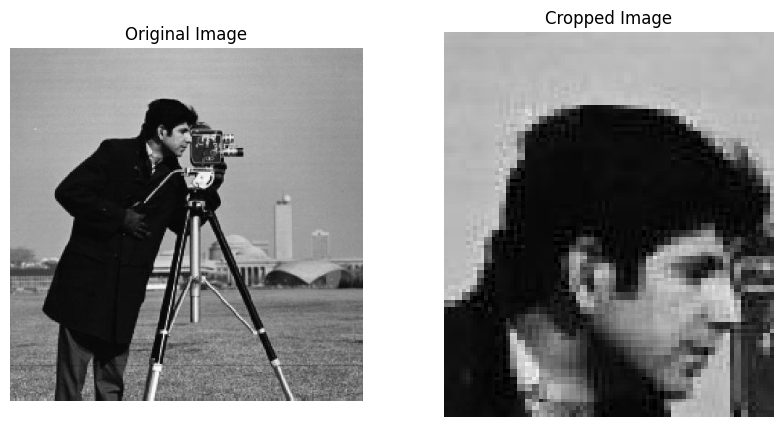

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
original_img = cv2.imread('./Images/cameraman.jpeg')

# Define the coordinates of the region of interest (ROI)
x_start, y_start = 170, 50
width, height = 90, 105
x_end, y_end = x_start + width, y_start + height

# Extract the region of interest (ROI) using array slicing
cropped_img = original_img[y_start:y_end, x_start:x_end]

# Plot the original and cropped images
fig, subplots = plt.subplots(1, 2, figsize=(10, 5))

subplots[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
subplots[0].set_title("Original Image")
subplots[0].axis('off')

subplots[1].imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
subplots[1].set_title("Cropped Image")
subplots[1].axis('off')

plt.show()


Task 4
Import the "dog.jpg" image and apply the following point processing to it.
<img src = "Images/dog.jpg" style="width:400px;height:400px">

a) Create a darker image by subtracting 128 from each pixel intensity value.

b) Create a low contrast image by diving each pixel intensity value by 2.

c) Invert the original image where the pixel values are updated as 255 - current pixel intensity value.

d) Create a brighter image by adding 128 to each pixel intensity value.

e) Create a high contrast image by multiplying each pixel intensity value by 2.

Display all of these images along with the original image in a 2X3 grid.


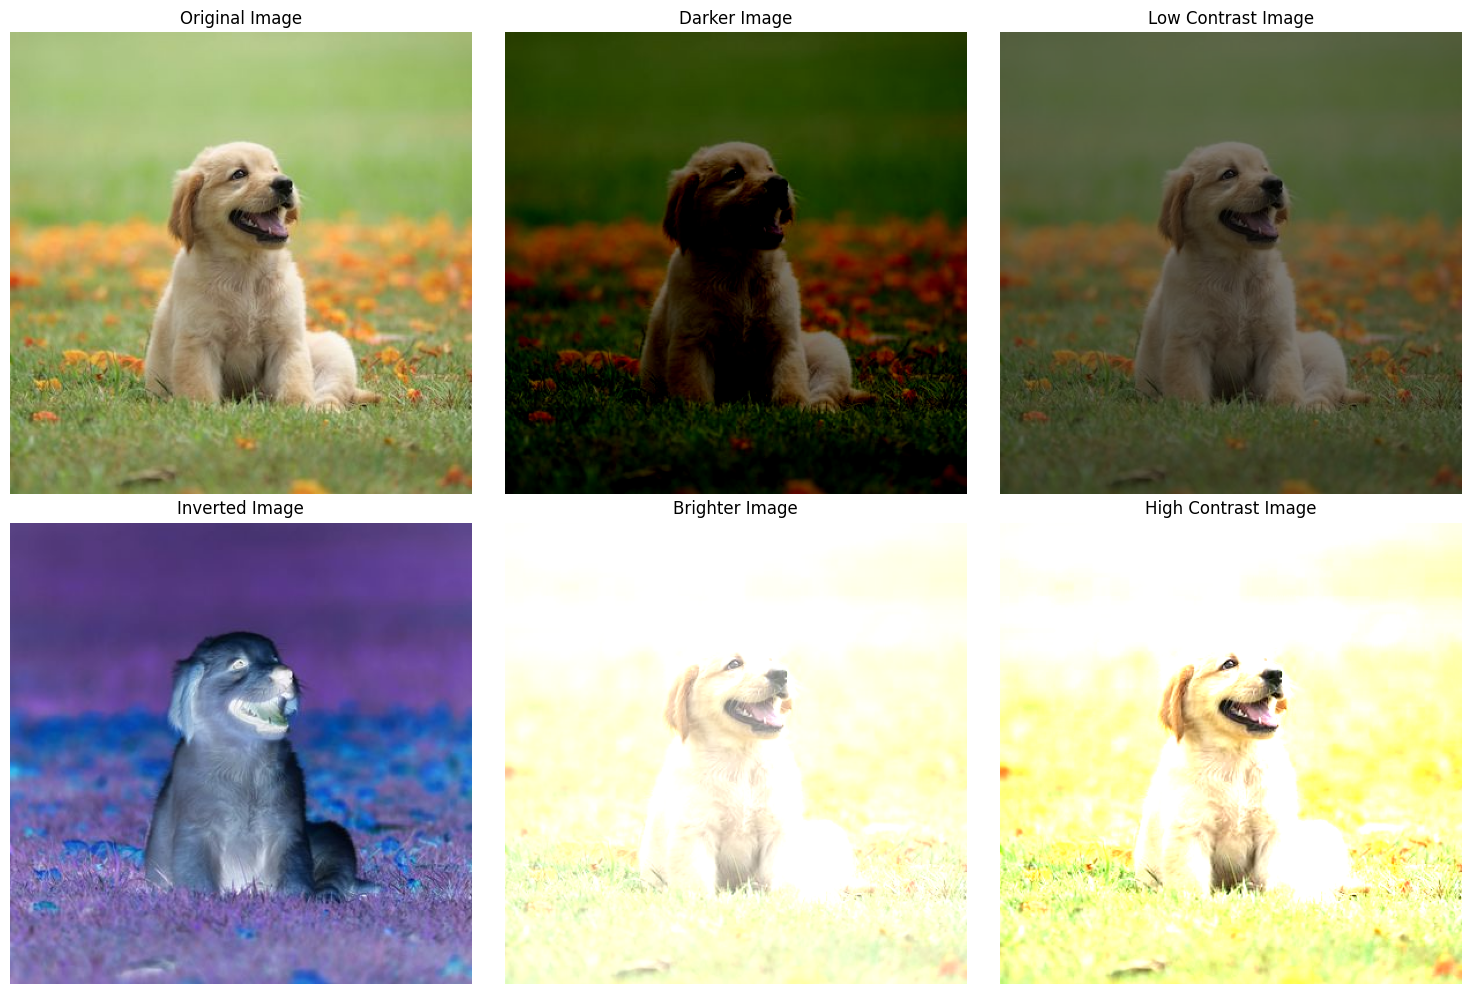

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
original_img = cv2.imread('Images/dog.jpg')

# Define constants
DARKEN_FACTOR = 128
BRIGHTEN_FACTOR = 128
CONTRAST_FACTOR = 2

# Perform point processing operations
darker_img = np.clip(original_img.astype(int) - DARKEN_FACTOR, 0, 255).astype(np.uint8)
low_contrast_img = np.clip(original_img.astype(float) / CONTRAST_FACTOR, 0, 255).astype(np.uint8)
inverted_img = 255 - original_img
brighter_img = np.clip(original_img.astype(int) + BRIGHTEN_FACTOR, 0, 255).astype(np.uint8)
high_contrast_img = np.clip(original_img.astype(float) * CONTRAST_FACTOR, 0, 255).astype(np.uint8)

# Display all images in a 2x3 grid
fig, subplots = plt.subplots(2, 3, figsize=(15, 10))

# Original image
subplots[0, 0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
subplots[0, 0].set_title('Original Image')
subplots[0, 0].axis('off')

# Darker image
subplots[0, 1].imshow(cv2.cvtColor(darker_img, cv2.COLOR_BGR2RGB))
subplots[0, 1].set_title('Darker Image')
subplots[0, 1].axis('off')

# Low contrast image
subplots[0, 2].imshow(cv2.cvtColor(low_contrast_img, cv2.COLOR_BGR2RGB))
subplots[0, 2].set_title('Low Contrast Image')
subplots[0, 2].axis('off')

# Inverted image
subplots[1, 0].imshow(cv2.cvtColor(inverted_img, cv2.COLOR_BGR2RGB))
subplots[1, 0].set_title('Inverted Image')
subplots[1, 0].axis('off')

# Brighter image
subplots[1, 1].imshow(cv2.cvtColor(brighter_img, cv2.COLOR_BGR2RGB))
subplots[1, 1].set_title('Brighter Image')
subplots[1, 1].axis('off')

# High contrast image
subplots[1, 2].imshow(cv2.cvtColor(high_contrast_img, cv2.COLOR_BGR2RGB))
subplots[1, 2].set_title('High Contrast Image')
subplots[1, 2].axis('off')

plt.tight_layout()
plt.show()


Task 5 

Import the "cameraman.jpeg" image 
<img src = "Images/cameraman.jpeg" style="width:487px;height:487px">

a) Perform average blur with kernel size 9X9 and 25X25. Display the original image with the filtered/processed images in a 1X3 grid.


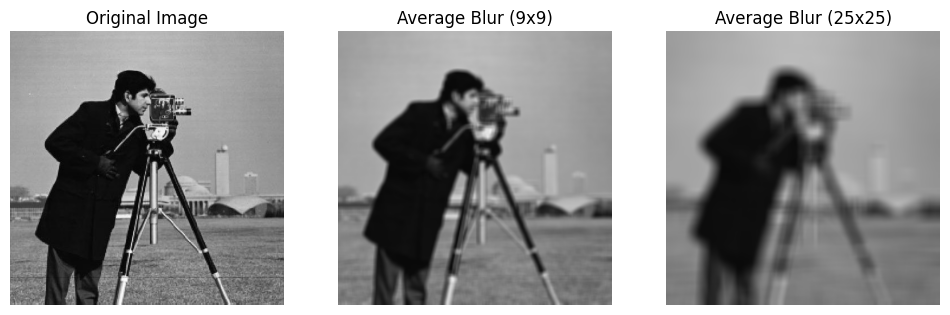

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
original_img = cv2.imread('Images/cameraman.jpeg')

# Apply average blur with kernel size 9x9
average_blur_9 = cv2.blur(original_img, (9, 9))

# Display the original image and the average blur with kernel size 9x9
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(average_blur_9, cv2.COLOR_BGR2RGB))
plt.title('Average Blur (9x9)')
plt.axis('off')

# Apply average blur with kernel size 25x25
average_blur_9 = cv2.blur(original_img, (25, 25))

# Apply average blur with kernel size 9x9
average_blur_25 = cv2.blur(original_img, (25, 25))

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(average_blur_9, cv2.COLOR_BGR2RGB))
plt.title('Average Blur (25x25)')
plt.axis('off')

plt.show()


b) Perform gaussian blur with kernel size 9X9, sigma (standard deviation of the Gaussian) of 2.0 and another gaussian blur with kernel size 25X25, sigma 15. Display the original image with the filtered/processed images in a 1X3 grid.

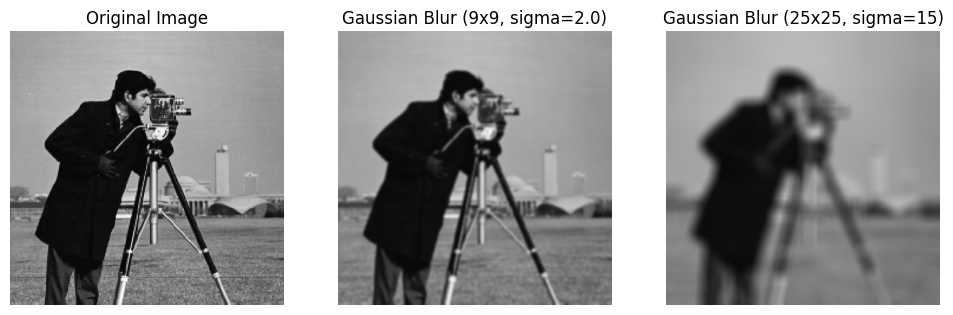

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
original_img = cv2.imread('Images/cameraman.jpeg')

# Apply Gaussian blur with kernel size 9x9 and sigma 2.0
gaussian_blur_9 = cv2.GaussianBlur(original_img, (9, 9), sigmaX=2.0)

# Apply Gaussian blur with kernel size 25x25 and sigma 15
gaussian_blur_25 = cv2.GaussianBlur(original_img, (25, 25), sigmaX=15.0)

# Display the original image and the Gaussian blurred images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(gaussian_blur_9, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Blur (9x9, sigma=2.0)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(gaussian_blur_25, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Blur (25x25, sigma=15)')
plt.axis('off')

plt.show()


c) Perform median blur with kernel size 5X5 and 15X15. Display the original image with the filtered/processed images in a 1X3 grid.

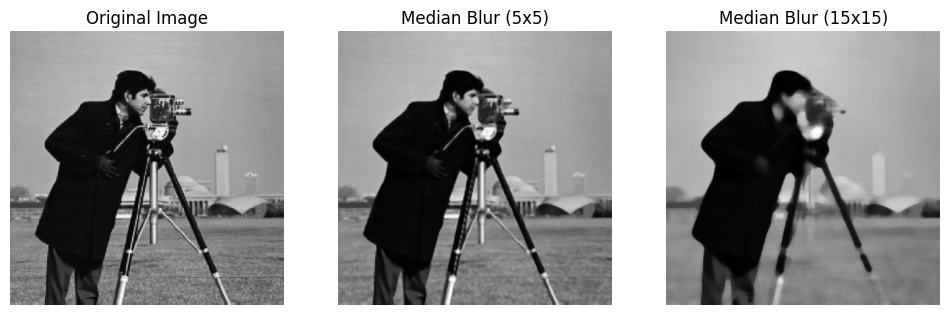

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
original_img = cv2.imread('Images/cameraman.jpeg', cv2.IMREAD_GRAYSCALE)

# Perform median blur with kernel size 5x5
median_blur_5 = cv2.medianBlur(original_img, 5)

# Perform median blur with kernel size 15x15
median_blur_15 = cv2.medianBlur(original_img, 15)

# Resize the images to a smaller size for comparison
resized_original_img = cv2.resize(original_img, (400, 400))
resized_median_blur_5 = cv2.resize(median_blur_5, (400, 400))
resized_median_blur_15 = cv2.resize(median_blur_15, (400, 400))

# Display the original image and the median blurred images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(resized_original_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(resized_median_blur_5, cmap='gray')
plt.title('Median Blur (5x5)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(resized_median_blur_15, cmap='gray')
plt.title('Median Blur (15x15)')
plt.axis('off')

plt.show()


d) Resize the guassian blurred image with kernel size 25X25 and sigma 15 to 40X40 pixels, and resize the original image to 40X40 pixels. Display the original image with the filtered/processed images in a 1X3 grid.

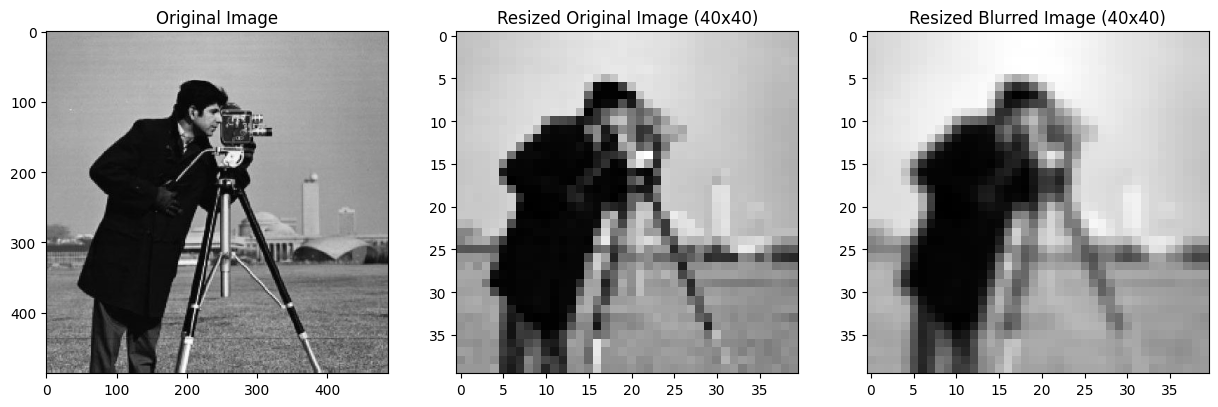

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the original image
image = cv2.imread('./Images/cameraman.jpeg')

# Load the blurred image
blurred_gauss_25x25 = cv2.GaussianBlur(image, (25, 25), sigmaX=15)

# Convert the images to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blurred_25x25 = cv2.cvtColor(blurred_gauss_25x25, cv2.COLOR_BGR2GRAY)

# Resize the original and blurred images to 40x40 pixels using OpenCV's resize function
resized_image = cv2.resize(gray_image, (40, 40), interpolation=cv2.INTER_AREA)
resized_blurred = cv2.resize(gray_blurred_25x25, (40, 40), interpolation=cv2.INTER_AREA)

# Plot the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(resized_image, cmap='gray')
plt.title('Resized Original Image (40x40)')

plt.subplot(1, 3, 3)
plt.imshow(resized_blurred, cmap='gray')
plt.title('Resized Blurred Image (40x40)')

plt.show()
